In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [22]:
History_Data = History_Data.dropna()
History_Data['Accumulated Day'] = 0

temp_day = 0
def fill_in_DayinWeek (x):
    global temp_day
    if x['Hour'] == 1:
        temp_day = temp_day + 1
    return temp_day
History_Data['Accumulated Day'] = History_Data.apply(fill_in_DayinWeek, axis = 1)
History_Data['Day in Week'] = History_Data['Accumulated Day'] % 7

In [23]:
#温度
#温度与体感温度的绝对值   74.0
#当前时刻（时间，周）
#节假日

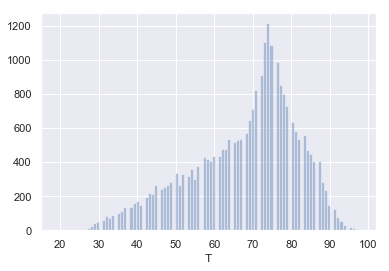

In [24]:
import seaborn as sns
sns.set(font_scale=1.)
temp = History_Data[History_Data['T'] >= 0]
ax = sns.distplot(History_Data['T'],bins=100, kde=False)

In [25]:
History_Data['AbsT'] = np.abs(History_Data['T'] - 74.0)

In [26]:
History_Data.head(5)

,Year,Month,Day,Hour,T,Load_kW,Accumulated Day,Day in Week,AbsT
0,2002,1,1,1,36.0,387190.0,1,1,38.0
1,2002,1,1,2,35.0,389977.0,1,1,39.0
2,2002,1,1,3,34.0,391881.0,1,1,40.0
3,2002,1,1,4,32.0,396362.0,1,1,42.0
4,2002,1,1,5,33.0,408553.0,1,1,41.0


In [27]:
History_Data.dtypes

Year                 int64
Month                int64
Day                  int64
Hour                 int64
T                  float64
Load_kW            float64
Accumulated Day      int64
Day in Week          int64
AbsT               float64
dtype: object

In [28]:
%%time

for time_in_day in [0,2,4,6,8,10,12,14,16,18,20,22]:
    for day_in_week in [0, 1, 2, 3, 4, 5, 6]:

        tempDF_hour = History_Data.loc[History_Data['Hour'].isin([time_in_day+ 1,time_in_day+ 2]) ,:] 
        tempDF_hour_day = tempDF_hour.loc[tempDF_hour['Day in Week'].isin([day_in_week]),:]
        
        begin_time_in_day = time_in_day+ 1
        end_time_in_day = time_in_day+ 2
        
        temp_name = 'Day' + '' + str(day_in_week) + 'inWeek_' + str(begin_time_in_day) + '-' + str(end_time_in_day)
        tempDF_hour_day.loc[:,temp_name] = 1
        History_Data = pd.merge(History_Data, tempDF_hour_day[[temp_name]], left_index= True, right_index= True,\
                                how='outer')
        History_Data = History_Data.fillna(0)

        temp_name2 = 'T*' + temp_name
        History_Data[temp_name2] = History_Data[temp_name] *  History_Data['T']
        
        temp_name3 = 'AbsT*' + temp_name
        History_Data[temp_name3] = History_Data[temp_name] *  History_Data['AbsT']

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


CPU times: user 1min 3s, sys: 18.1 s, total: 1min 21s
Wall time: 14.1 s


In [29]:
History_Data.shape

(26304, 261)

In [33]:
History_Data.to_csv('linear regression.csv')

In [30]:
History_Data

,Year,Month,Day,Hour,T,Load_kW,Accumulated Day,Day in Week,AbsT,Day0inWeek_1-2,...,AbsT*Day3inWeek_23-24,Day4inWeek_23-24,T*Day4inWeek_23-24,AbsT*Day4inWeek_23-24,Day5inWeek_23-24,T*Day5inWeek_23-24,AbsT*Day5inWeek_23-24,Day6inWeek_23-24,T*Day6inWeek_23-24,AbsT*Day6inWeek_23-24
0,2002,1,1,1,36.0,387190.0,1,1,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002,1,1,2,35.0,389977.0,1,1,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,1,1,3,34.0,391881.0,1,1,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002,1,1,4,32.0,396362.0,1,1,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002,1,1,5,33.0,408553.0,1,1,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2002,1,1,6,32.0,426902.0,1,1,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2002,1,1,7,31.0,449139.0,1,1,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2002,1,1,8,32.0,473425.0,1,1,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2002,1,1,9,36.0,487921.0,1,1,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2002,1,1,10,40.0,472487.0,1,1,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.linear_model import LinearRegression
X = History_Data.drop('Load_kW', axis = 1)
y = History_Data['Load_kW']

In [19]:
print(X.shape)

(26304, 260)


In [14]:
reg = LinearRegression().fit(X, y)

In [15]:
reg.score(X, y)

0.7357579414732378

In [16]:
reg.coef_

array([ 2.33496671e+06,  1.95741550e+05,  6.53669614e+03,  2.19321803e+03,
        8.22651749e+03, -6.36891721e+03, -2.06166002e+04,  1.09947267e+04,
        5.08157398e+04, -1.77518568e+03, -2.30993268e+03, -3.26730678e+05,
        3.55107291e+03,  3.38865065e+03, -3.49919684e+05,  4.21332367e+03,
        3.61506342e+03, -2.23589139e+05,  2.73335394e+03,  2.33513814e+03,
       -4.33063690e+05,  5.80876999e+03,  5.33417690e+03, -3.60118572e+05,
        5.14170295e+03,  5.18216270e+03, -1.34261332e+05,  2.38421086e+03,
        2.61663782e+03, -1.54362070e+04, -1.39853252e+03, -7.65658231e+02,
       -2.75686997e+05,  2.41750823e+03,  3.19585335e+03, -2.37890254e+05,
        2.24172160e+03,  2.65435932e+03, -1.96897188e+05,  1.88705114e+03,
        2.50739635e+03, -3.64632319e+05,  4.40499199e+03,  4.94620519e+03,
       -3.61337642e+05,  4.62629496e+03,  5.63102205e+03, -1.14793841e+05,
        1.59730247e+03,  2.65698957e+03,  4.34625833e+05, -7.46375476e+03,
       -5.65888439e+03, -

In [17]:
y_predict = reg.predict(X)
rms = sqrt(mean_squared_error(y_predict, y))
print(rms)
mape = mean_absolute_percentage_error(y_predict, y)
print(mape)

56063.121616741475
13.796222560121555


In [18]:
#6*7*2
#75902.31558552023
#19.04601258164564

#12*7*2
#70634.93889152797
#18.015848758965845

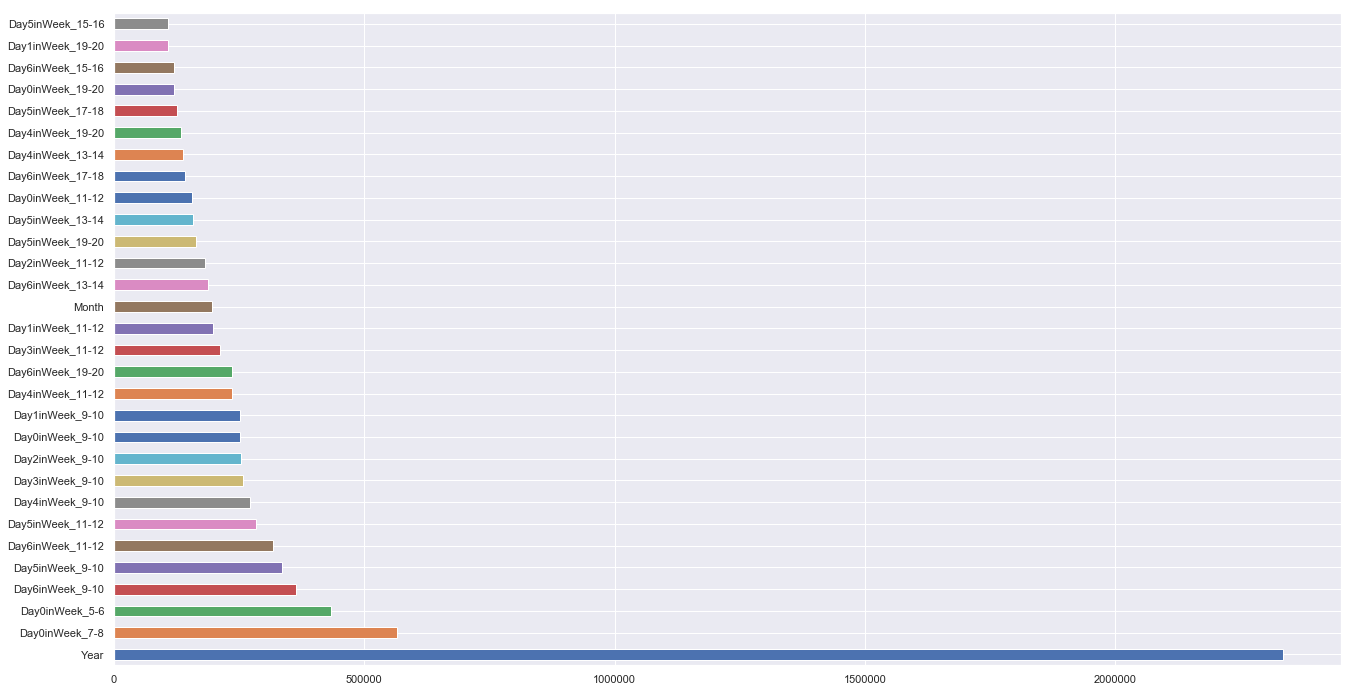

In [261]:
plt.figure(figsize = (22,12))
pd.Series(reg.coef_, index=X.columns).nlargest(30).plot(kind='barh')

In [ ]:
#------------------------BELOW IS FORMAL----------------------------------------------

In [323]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

History_Data = History_Data.dropna()
History_Data['Accumulated Day'] = 0

temp_day = 0
def fill_in_DayinWeek (x):
    global temp_day
    if x['Hour'] == 1:
        temp_day = temp_day + 1
    return temp_day
History_Data['Accumulated Day'] = History_Data.apply(fill_in_DayinWeek, axis = 1)
History_Data['Day in Week'] = History_Data['Accumulated Day'] % 7

History_Data['AbsT'] = np.abs(History_Data['T'] - 74.0)

In [324]:
%%time

for time_in_day in [0,2,4,6,8,10,12,14,16,18,20,22]:
    for day_in_week in [0, 1, 2, 3, 4, 5, 6]:

        tempDF_hour = History_Data.loc[History_Data['Hour'].isin([time_in_day+ 1,time_in_day+ 2]) ,:] 
        tempDF_hour_day = tempDF_hour.loc[tempDF_hour['Day in Week'].isin([day_in_week]),:]
        
        begin_time_in_day = time_in_day+ 1
        end_time_in_day = time_in_day+ 2
        
        temp_name = 'Day' + '' + str(day_in_week) + 'inWeek_' + str(begin_time_in_day) + '-' + str(end_time_in_day)
        tempDF_hour_day.loc[:,temp_name] = 1
        History_Data = pd.merge(History_Data, tempDF_hour_day[[temp_name]], left_index= True, right_index= True,\
                                how='outer')
        History_Data = History_Data.fillna(0)

        temp_name2 = 'T*' + temp_name
        History_Data[temp_name2] = History_Data[temp_name] *  History_Data['T']
        
        temp_name3 = 'AbsT*' + temp_name
        History_Data[temp_name3] = History_Data[temp_name] *  History_Data['AbsT']



CPU times: user 2min 37s, sys: 25.9 s, total: 3min 3s
Wall time: 1min 21s


In [325]:
test.head(3)

,Year,Month,Day,Hour,T,Load_kW,Accumulated Day,Day in Week,AbsT,Day0inWeek_1-2,...,AbsT*Day3inWeek_23-24,Day4inWeek_23-24,T*Day4inWeek_23-24,AbsT*Day4inWeek_23-24,Day5inWeek_23-24,T*Day5inWeek_23-24,AbsT*Day5inWeek_23-24,Day6inWeek_23-24,T*Day6inWeek_23-24,AbsT*Day6inWeek_23-24
17520,2004,1,1,1,46.0,251611.0,731,3,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17521,2004,1,1,2,45.0,246499.0,731,3,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17522,2004,1,1,3,43.0,239736.0,731,3,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
train=History_Data.iloc[0:17520,:]
test=History_Data.iloc[17520:26303,:]

from sklearn.linear_model import LinearRegression
X_train = train.drop('Load_kW', axis = 1)
y_train = train['Load_kW']
X_test = test.drop('Load_kW', axis = 1)
y_test = test['Load_kW']

In [327]:
reg = LinearRegression().fit(X_train, y_train)

In [329]:
y_predict = reg.predict(X_test)
rms = sqrt(mean_squared_error(y_predict, y_test))
print(rms)
mape = mean_absolute_percentage_error(y_predict, y_test)
print(mape)

63400.787635746565
14.27626738859263


In [ ]:
#63400.787635746565
#14.27626738859263

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


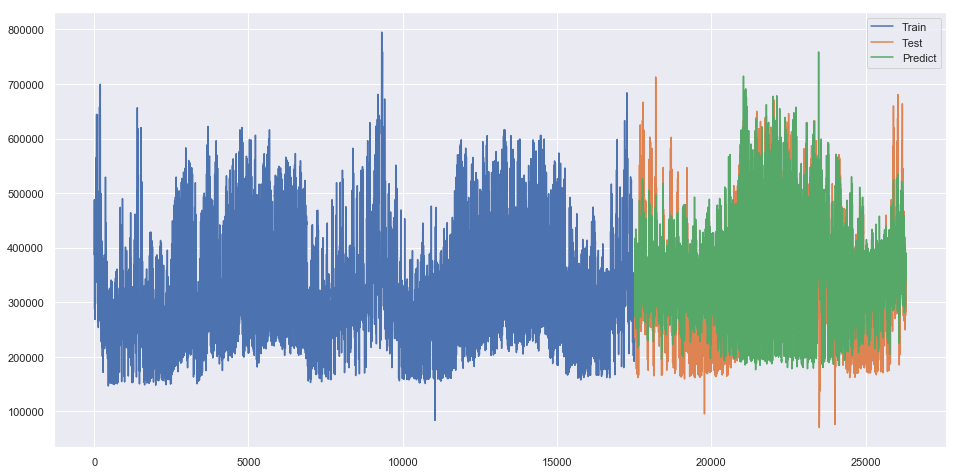

In [336]:
y_hat_avg = test[['Load_kW']]
y_hat_avg['Predict'] = y_predict
plt.figure(figsize=(16,8))

y_hat_avg = y_hat_avg.dropna()

plt.plot(train['Load_kW'], label='Train')
plt.plot(y_hat_avg['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Predict'], label='Predict')
plt.legend(loc='best')
plt.show()

In [ ]:
#-----------------------------BELOW IS TRAIN---------------------------------------#

In [338]:
y_predict = reg.predict(X_train)
rms = sqrt(mean_squared_error(y_predict, y_train))
print(rms)
mape = mean_absolute_percentage_error(y_predict, y_train)
print(mape)

53585.62670891933
13.64578705293377


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


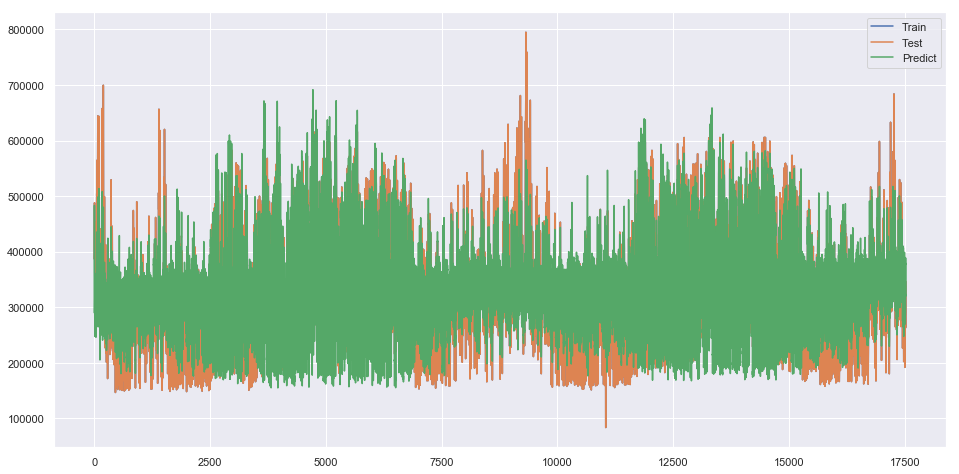

In [340]:
y_hat_avg = train[['Load_kW']]
y_hat_avg['Predict'] = y_predict
plt.figure(figsize=(16,8))

y_hat_avg = y_hat_avg.dropna()

plt.plot(train['Load_kW'], label='Train')
plt.plot(y_hat_avg['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Predict'], label='Predict')
plt.legend(loc='best')
plt.show()